# Enhancing Depth Estimation with Iterative Stereo-LiDAR Fusion: <br />An Application of the Papoulis-Gerchberg Algorithm

### Import and Load Statements

In [37]:
import os
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

In [60]:
gt_depth = np.load("dataset/Processed/gtDepthMap_overlap.npy")
stereo_depth = np.load("dataset/Processed/stereoDepthMap_overlap.npy")
lidar_depth = np.load("dataset/Processed/lidarDepthMap_overlap.npy")
filled_depth = np.load("dataset/Processed/filled.npy")
rgb = np.load("dataset/Processed/rgb_overlap.npy")

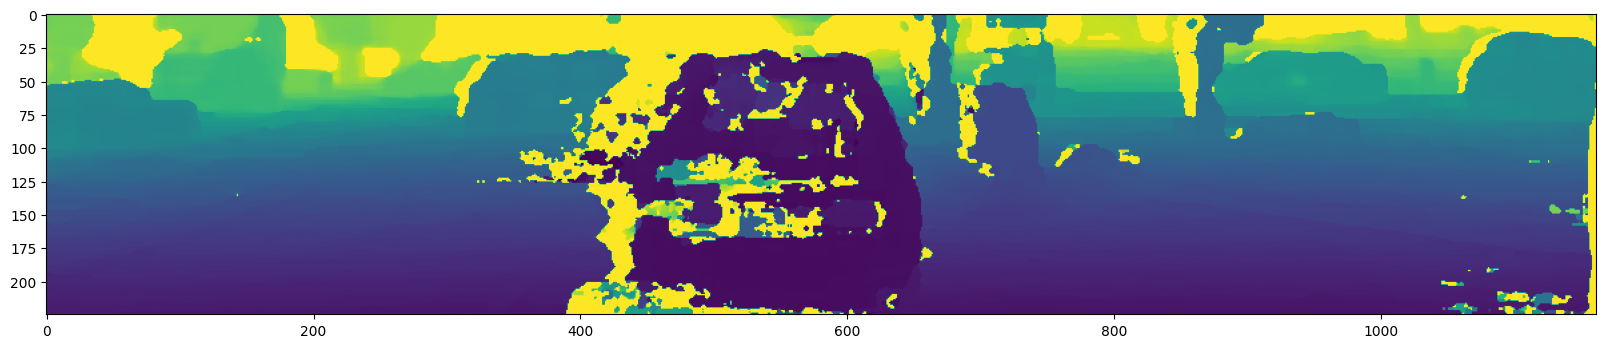

In [39]:
plt.imshow(np.log(stereo_depth))

### Calibration of LiDAR and Stereo sensors

In [40]:
calib_path = 'dataset/data_scene_flow_calib/training/calib_velo_to_cam/000112.txt'

with open(calib_path, 'r') as f:
    calib = f.readlines()

R_cam_velo = np.array([float(x)
                      for x in calib[1].strip().split(' ')[1:]]).reshape((3, 3))
t_cam_velo = np.array([float(x)
                      for x in calib[2].strip().split(' ')[1:]])[:, None]

T_cam_velo = np.vstack((np.hstack((R_cam_velo, t_cam_velo)),
                        np.array([0, 0, 0, 1])))

### Infill

In [67]:
np.mean(filled_depth[filled_depth < 100])

16.797955

### Implementation of Papoulis Gerchberg

#### Filters

#### Body

### Display the results